# 코랩에서 한글폰트 사용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

**런타임 다시 시작

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

#패키지 불러오기



In [2]:
import pandas as pd
import os

#파일 경로 설정

In [3]:
cctv_csvPath = '/content/drive/MyDrive/중급_AI/drive-download-20230116T050331Z-001.zip (Unzipped Files)/DS.EX/data/01. CCTV_in_Seoul.csv'
pop_xlsPath = '/content/drive/MyDrive/중급_AI/drive-download-20230116T050331Z-001.zip (Unzipped Files)/DS.EX/data/01. population_in_Seoul.xls'

#CSV 파일 불러오기

In [4]:
cctv_Seoul = pd.read_csv(cctv_csvPath)

In [5]:
cctv_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
cctv_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
22,종로구,1002,464,314,211,630
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109


In [7]:
cctv_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [8]:
#cctv_Seoul.columns = ['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
cctv_Seoul.rename(columns = {cctv_Seoul.columns[0] : '구별'}, inplace = True)

In [9]:
cctv_Seoul.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

#excel 파일 불러오기

In [10]:
pop_Seoul = pd.read_excel(pop_xlsPath)

In [11]:
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


#excel 파일 불러오기 - 세부 옵션 설정
### header 위에 부분 생략하고 들고옴
### usecols 사용할 columns만 들고옴

In [12]:
pop_Seoul = pd.read_excel(pop_xlsPath, header = 2, usecols = 'B,D,G,J,N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
pop_Seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [14]:
pop_Seoul.columns = ['구별', '인구수', '한국인', '외국인', '고령자']

In [15]:
pop_Seoul.columns

Index(['구별', '인구수', '한국인', '외국인', '고령자'], dtype='object')

In [16]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


#CCTV 데이터 확인하기

In [17]:
cctv_Seoul.sort_values(by = '소계',ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


#최근증가율 분석

In [18]:
cctv_Seoul['최근증가율'] = ((cctv_Seoul['2016년'] + cctv_Seoul['2015년'] + cctv_Seoul['2014년'] )/ cctv_Seoul['2013년도 이전'] *100)
cctv_Seoul.sort_values(by = '최근증가율',ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


#인구 데이터 확인하기

In [19]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


#불필요한 데이터 삭제 ( 합계, 26행)

In [20]:
pop_Seoul.drop([0,26], inplace = True)

In [21]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


#index 번호 초기화
###drop  옛날 index를 삭제

In [22]:
pop_Seoul.reset_index(drop = True, inplace = True)

In [23]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
0,종로구,162820.0,153589.0,9231.0,25425.0
1,중구,133240.0,124312.0,8928.0,20764.0
2,용산구,244203.0,229456.0,14747.0,36231.0
3,성동구,311244.0,303380.0,7864.0,39997.0
4,광진구,372164.0,357211.0,14953.0,42214.0
5,동대문구,369496.0,354079.0,15417.0,54173.0
6,중랑구,414503.0,409882.0,4621.0,56774.0
7,성북구,461260.0,449773.0,11487.0,64692.0
8,강북구,330192.0,326686.0,3506.0,54813.0
9,도봉구,348646.0,346629.0,2017.0,51312.0


In [24]:
print(pop_Seoul['구별'].unique())
print(len(pop_Seoul['구별'].unique()))

['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구']
25


In [25]:
#pop_Seoul.isna()
pop_Seoul.isnull()

,구별,인구수,한국인,외국인,고령자
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [26]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

In [27]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
3,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [28]:
pop_Seoul.sort_values(by = '외국인비율',ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
18,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
16,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
5,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
12,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797
20,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#DataFrame 합치기
### 1. concat 
### 2. join
### 3. merge

In [29]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [30]:
cctv_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252


In [31]:
len(pop_Seoul['구별'].unique())

25

In [32]:
len(cctv_Seoul['구별'].unique())

25

In [33]:
data_result = pd.merge(cctv_Seoul, pop_Seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [34]:
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [35]:
data_result.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis =1 ,inplace = True)

In [36]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#상관관계 계산해주는 모듈 

In [37]:
import numpy as np

In [38]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [39]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [40]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [41]:
income_Path = '/content/drive/MyDrive/중급_AI/drive-download-20230116T050331Z-001.zip (Unzipped Files)/DS.EX/data/1인당+지역내+총생산+및+지출_20230117145756.csv'

In [42]:
income_Seoul = pd.read_csv(income_Path)

In [43]:
income_Seoul.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2018.2,2018.3,2019,2019.1,2019.2,2019.3,2020,2020.1,2020.2,2020.3
0,1인당 지역내 총생산,1인당 지역내 총생산,1인당 지역내 총생산,1인당 지역내 총생산,1인당 지역내 총생산,1인당 지역내 총생산,1인당 지역내 총생산,1인당 지역내 총생산,1인당 지역내 총생산,1인당 지역내 총생산,...,1인당 지역총소득,1인당 개인소득,1인당 지역내 총생산,1인당 민간소비,1인당 지역총소득,1인당 개인소득,1인당 지역내 총생산,1인당 민간소비,1인당 지역총소득,1인당 개인소득
1,2356,2753,3192,3666,4150,4997,6075,7004,7949,9250,...,48362,23323,45118,21991,48693,23978,46221,21185,49006,24226


#Matplotlib 패키지로 그래프 그리기

In [44]:
import matplotlib.pyplot as plt

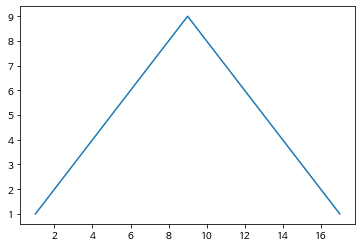

In [45]:
#빈 캔버스를 초기화한다.
plt.figure()


x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]
z= np.arange(1,18,1)

#그래프를 메모리상에서 그리고
plt.plot(z,y)

#그래프를 출력한다.
plt.show()

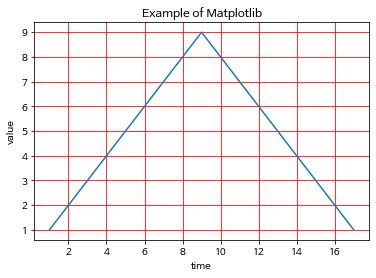

In [46]:
#빈 캔버스를 초기화한다.
plt.figure()


x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]
z= np.arange(1,18,1)

#그래프를 메모리상에서 그리고
plt.plot(z,y)
plt.grid(color = 'r')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Example of Matplotlib')

#그래프를 출력한다.
plt.show()

#하나의 그래프에 2개 그리기 (겹쳐그리기)

<function matplotlib.pyplot.show(*args, **kw)>

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


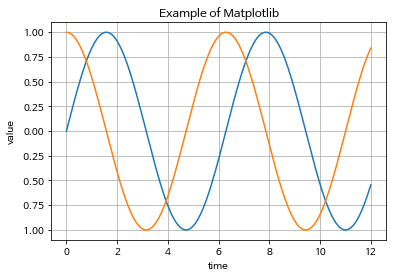

In [47]:
plt.figure()

t = np.arange(0,12,0.01)
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('value')
plt.title('Example of Matplotlib')

plt.show

#범례추가하기 (legend 추가)

<function matplotlib.pyplot.show(*args, **kw)>

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


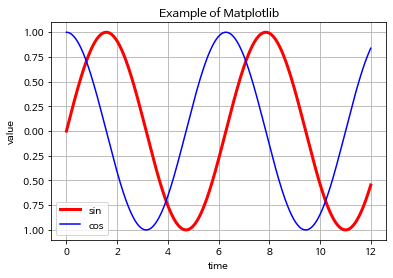

In [48]:
plt.figure()

t = np.arange(0,12,0.01)
plt.plot(t, np.sin(t),'r', lw = 3, label = 'sin')
plt.plot(t, np.cos(t),'b', label = 'cos')
plt.grid()
plt.xlabel('time')
plt.ylabel('value')
plt.title('Example of Matplotlib')
plt.legend()

plt.show

# 아래주소 wiki 참조해서 그려보기
https://wikidocs.net/137791

#그래프 색상, 선두께 지정하기

<function matplotlib.pyplot.show(*args, **kw)>

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


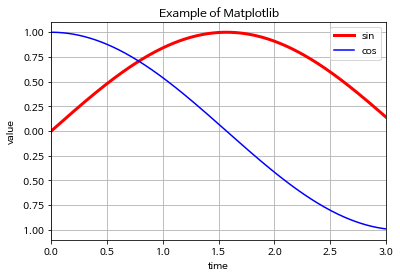

In [49]:
plt.figure()

t = np.arange(0,12,0.01)
plt.plot(t, np.sin(t),'r', lw = 3, label = 'sin')
plt.plot(t, np.cos(t),'b', label = 'cos')
plt.grid()
plt.xlabel('time')
plt.ylabel('value')
plt.xlim(0,3)  # x 축 부분 확대 지점
plt.ylim(-1.1,1.1)  #y축 부분 확대 지점
plt.title('Example of Matplotlib')
plt.legend()

plt.show

#scatter 함수로 그리기

In [50]:
t = np.arange(0,10,1)
y = [9,8,7,6,5,4,3,2,1,0]

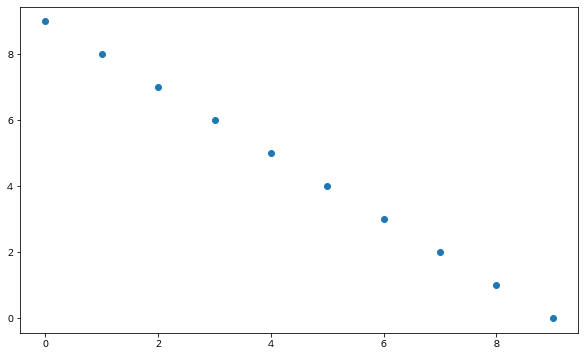

In [51]:
plt.figure(figsize = (10,6))
plt.scatter(t,y)
plt.show()

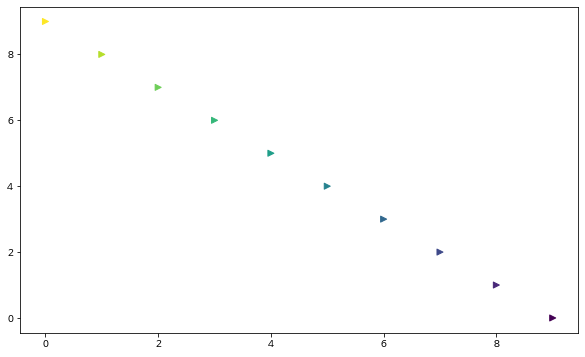

In [52]:
plt.figure(figsize = (10,6))
plt.scatter(t,y, marker = '>', c=y)
plt.show()

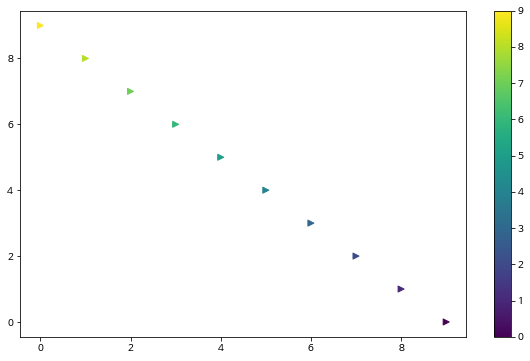

In [53]:
plt.figure(figsize = (10,6))
plt.scatter(t,y, marker = '>', c=y)
plt.colorbar()
plt.show()

In [56]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [58]:
data_result.set_index(keys=['구별'] , inplace = True)

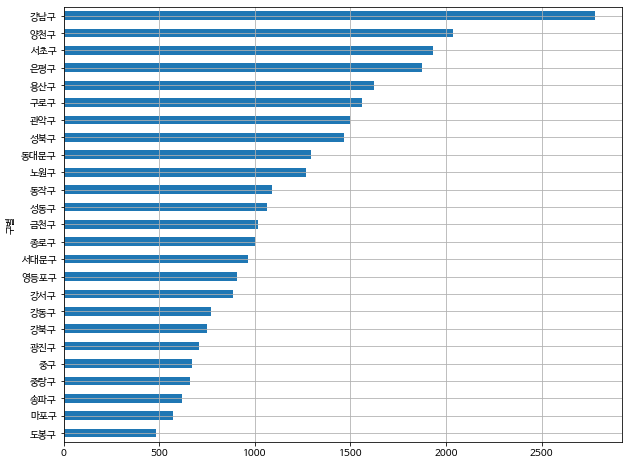

In [63]:
plt.figure(figsize=(10,8))
data_result['소계'].sort_values().plot(kind = 'barh', grid = True)
plt.show()

###인구당 CCTV 비율 추가

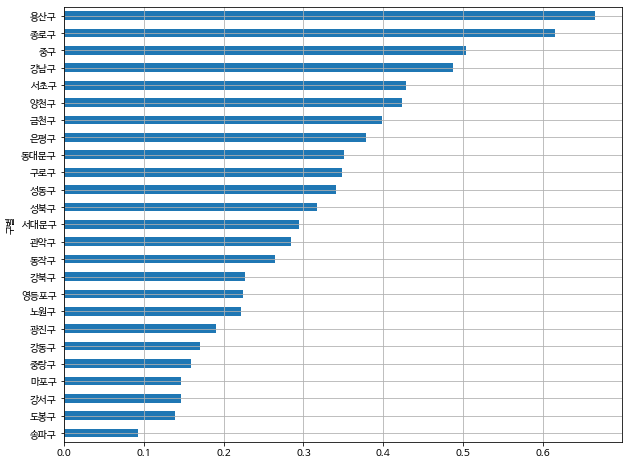

In [64]:
data_result['CCTV 인구당 비율'] = data_result['소계']/data_result['인구수'] *100
data_result['CCTV 인구당 비율'].sort_values().plot(kind='barh', grid = True, figsize = (10,8))
plt.show()

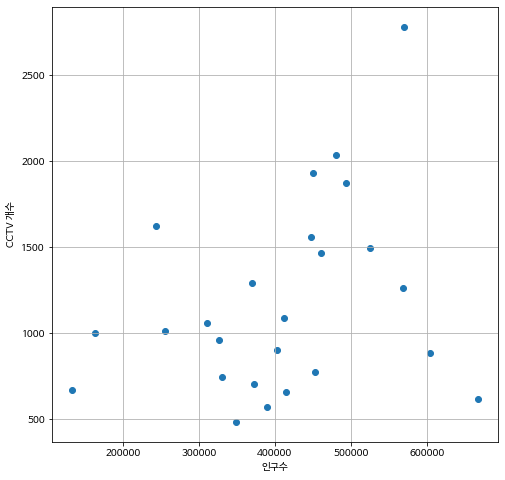

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(data_result['인구수'],data_result['소계'])   #plt.scatter(x축, y축, )
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

#numpy의 polyfit()
### 데이터의 선형그래프 표기

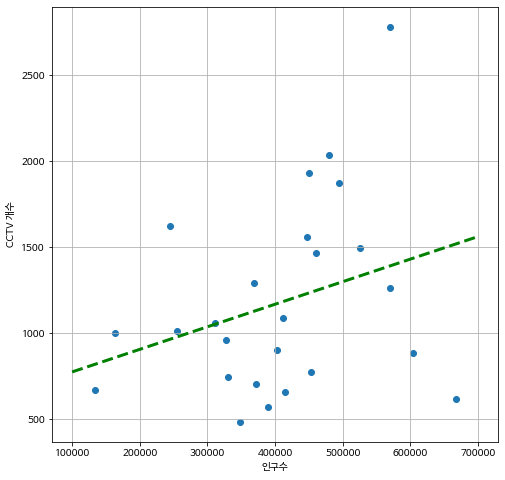

In [68]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

plt.figure(figsize=(8,8))
plt.scatter(data_result['인구수'],data_result['소계'])   #plt.scatter(x축, y축, )
plt.plot(fx,f1(fx), ls='dashed', lw =3 , color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

In [72]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 인구당 비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.378852,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155


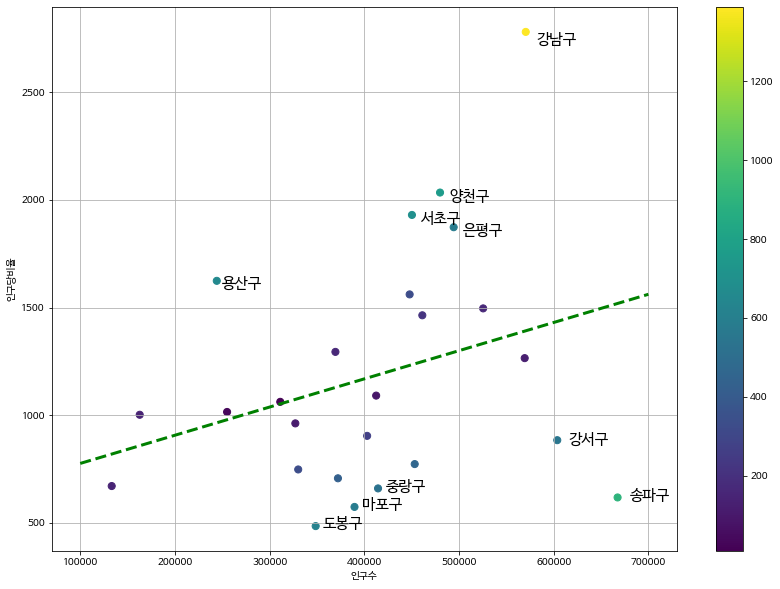

In [73]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()